# <font color = lightcoral>Implementing LogBert for BGL
>    
>First Transformer based model

## <font color = grey> Admin

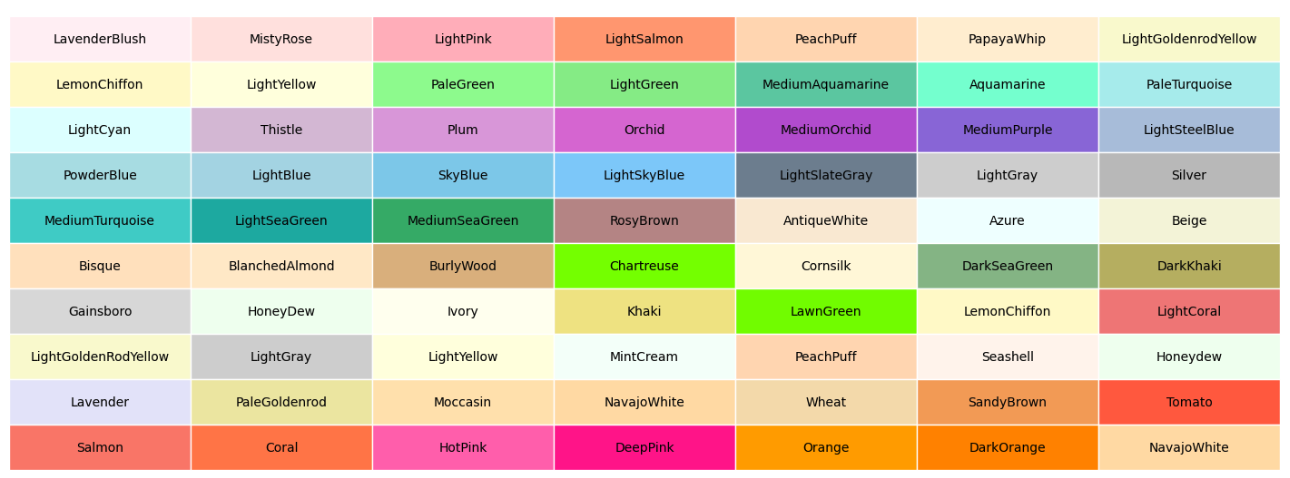

In [2]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [3]:
# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

Base directory set to: /home/sagemaker-user


### <font color = blue>Install Libraries --> Needed every new kernel session

___
# <font color = lightsalmon> About the Data | seq_id

#### <font color = blue>R02-M1-N0-C:J12-U11

><font color = sandybrown>R02: This likely represents a Rack number.
>
>>R02 suggests it is Rack number 2. Racks house multiple midplanes, modules, and nodes.
>
><font color = sandybrown>M1: This likely represents a Midplane or Module within the rack.
>
>>M1 indicates Midplane or Module number 1 within Rack 2.
>
><font color = sandybrown>N0: This likely represents a Node within the midplane or module.
>
>>N0 suggests it is Node number 0 within Midplane 1 of Rack 2.
>
><font color = sandybrown>C
>> : This part indicates further subdivisions or components within the node:
>
>><font color = lightseagreen>C: might denote a specific Component within the node.
>
>><font color = lightseagreen>J12: This likely represents a Junction or Jack number.
>
>><font color = lightseagreen>J12 suggests Junction number 12 within the component.
>
>><font color = lightseagreen>U11: This likely represents a Unit number within the junction.
>
>><font color = lightseagreen>U11 indicates Unit number 11 within Junction 12.

___
# <font color = darkkhaki> 1. Admin

___
### <font color = sandybrown> Steps to setup Libraries (including PyTorch)

**<font color = blue> In a new Python env**
    
**<font color = red> As a temporary measure, I am trying to install in the base version itself**

**location of library**

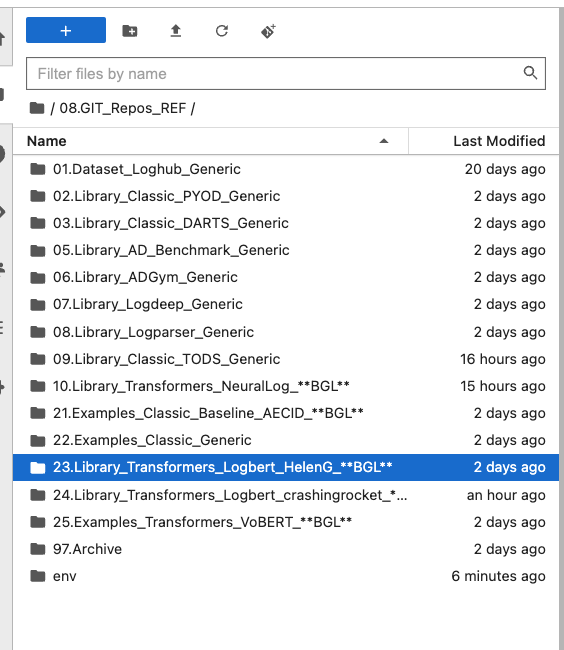

In [4]:
# python3 -m pip install --user virtualenv
# python3 -m venv env
# source env/bin/activate
# pip install -r ./environment/requirements.txt
# deactivate

In [5]:
 # Fixed the scikit-learn typo in the requirements file

**<font color = tomato>successfully installed libraries in a new python env**

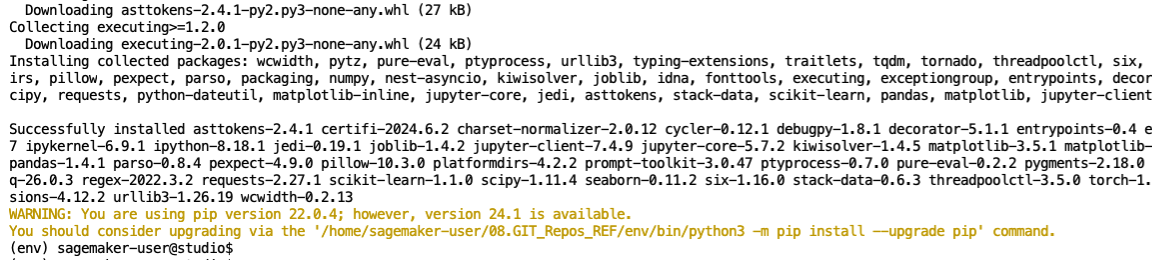

---

## <font color = blue>Download BGL Logs --> DONE

___
#### <font color = sandybrown>  Change Operation Directory to scripts folder (download BGL logs only)

In [6]:
# # # Define the target directory
# # target_directory = os.path.join(base_dir, '02.Baseline_Models/01.StartOver_AECID_Baseline')


# target_directory = os.path.join(base_dir, '08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_**BGL**/scripts')

# # # Change to the target directory
# os.chdir(target_directory)
# print(f"Changed directory to: {os.getcwd()}")

In [7]:
# !ls

In [8]:
# !bash download_bgl.sh

### <font color = pink>Log File Stored in .dataset folder in $HOME
    
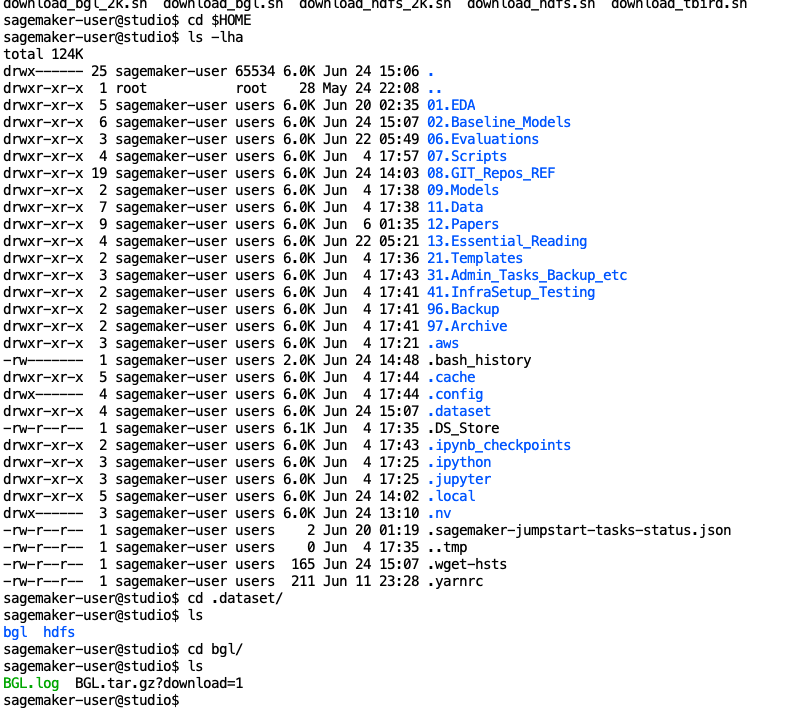    

## <font color = blue>Run Data Process --> <font color = red> DONE

___
#### <font color = sandybrown>  Change Operation Directory

In [9]:
# # # Define the target directory
# # target_directory = os.path.join(base_dir, '02.Baseline_Models/01.StartOver_AECID_Baseline')

# target_directory = os.path.join(base_dir, "/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/BGL")

# # # Change to the target directory
# os.chdir(target_directory)
# print(f"Changed directory to: {os.getcwd()}")

___
#### <font color = sandybrown>  Download Logs --> Original --> <font color = red>DONE

#### Source Log File (downloaded)

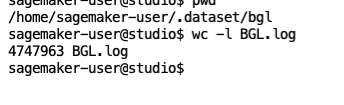

___
#### <font color = sandybrown>  Run Parser --> <font color = red> DONE

In [10]:
# !python3 data_process.py

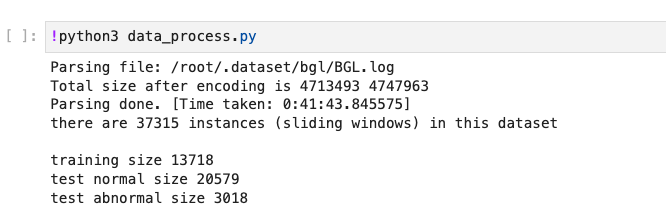

___
# <font color = darkkhaki> 2. EDA of Parsed file

## <font color = blue>EDA of Template File

In [11]:
import pandas as pd
import time

# Define the path to the CSV file
# file_path = "/root/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_templates.csv"

# file_path = "/root/mnt/efs-w210-capstone/200015/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_templates.csv"

file_path = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_templates.csv')

# /mnt/efs-w210-capstone/200015/

# Start timing
start_time = time.time()

# Read the CSV file
df = pd.read_csv(file_path)

# Section 1: Preview
print("\n" + "*"*100)
print("********************** Section 1: Preview ******************************************")
print("*"*100 + "\n")
display(df.head())

# Section 2: Shape of the DataFrame
print("\n" + "*"*100)
print("********************** Section 2: Shape of the DataFrame ****************************")
print("*"*100 + "\n")
print(df.shape)

# Section 3: DataFrame Information
print("\n" + "*"*100)
print("********************** Section 3: DataFrame Information ****************************")
print("*"*100 + "\n")
print(df.info())

# Section 4: Summary Statistics (without scientific notation)
print("\n" + "*"*100)
print("********************** Section 4: Summary Statistics *******************************")
print("*"*100 + "\n")
pd.options.display.float_format = '{:,.0f}'.format
print(df.describe())

# Section 5: Unique Event IDs
print("\n" + "*"*100)
print("********************** Section 5: Unique Event IDs *********************************")
print("*"*100 + "\n")
print(df['EventId'].nunique())

# Section 7: Most Frequent Event Templates with Counts (ordered by occurrences)
print("\n" + "*"*100)
print("********************** Section 7: Most Frequent Event Templates *********************")
print("*"*100 + "\n")
df_sorted = df.sort_values(by='Occurrences', ascending=False).reset_index()
df_sorted.index += 1  # Make the index start from 1
df_sorted.rename(columns={'index': 'RowNum'}, inplace=True)
print(df_sorted[['EventId', 'RowNum', 'EventTemplate', 'Occurrences']].head())

# Section 8: Relevant Statistics
print("\n" + "*"*100)
print("********************** Section 8: Relevant Statistics *******************************")
print("*"*100 + "\n")

# Total number of events
total_events = df['Occurrences'].sum()
print(f"Total number of events: {total_events}")

# Average occurrences per event template
average_occurrences = df['Occurrences'].mean()
print(f"Average occurrences per event template: {average_occurrences:.2f}")

# Maximum occurrences of a single event template
max_occurrences = df['Occurrences'].max()
max_event_template = df[df['Occurrences'] == max_occurrences]['EventTemplate'].values[0]
print(f"Maximum occurrences of a single event template: {max_occurrences} (Event Template: {max_event_template})")

# Minimum occurrences of a single event template
min_occurrences = df['Occurrences'].min()
min_event_template = df[df['Occurrences'] == min_occurrences]['EventTemplate'].values[0]
print(f"Minimum occurrences of a single event template: {min_occurrences} (Event Template: {min_event_template})")

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)



****************************************************************************************************
********************** Section 1: Preview ******************************************
****************************************************************************************************



,EventId,EventTemplate,Occurrences
0,3aa50e45,instruction cache parity error corrected,105924
1,b9250ad9,MidplaneSwitchController performing bit sparing on R<*>-M<*>-L<*>-U<*>-C bit <*>,964
2,fc5f0940,generating core.<*>,1706751
3,1840cbfe,"<*> ddr errors(s) detected and corrected on rank <*>, symbol <*>, bit <*>",33939
4,828a502b,<*> <*> <*> error(s) (dcr <*>) detected and corrected,5040



****************************************************************************************************
********************** Section 2: Shape of the DataFrame ****************************
****************************************************************************************************

(1000, 3)

****************************************************************************************************
********************** Section 3: DataFrame Information ****************************
****************************************************************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EventId        1000 non-null   object
 1   EventTemplate  1000 non-null   object
 2   Occurrences    1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB
None

**********************************

## <font color = blue>EDA of Parsed File

---

In [12]:
import pandas as pd
import time

# Define the path to the CSV file
# file_path = "/root/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv"

# file_path = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv')
file_path = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/20240701_BGL_Log_Structuted_v1.00.csv')

# Start timing
start_time = time.time()

# Read the CSV file
df = pd.read_csv(file_path)

# Section 1: Preview
print("\n" + "*"*100)
print("********************** Section 1: Preview ******************************************")
print("*"*100 + "\n")
display(df.head())

# Section 2: Shape of the DataFrame
print("\n" + "*"*100)
print("********************** Section 2: Shape of the DataFrame ****************************")
print("*"*100 + "\n")
print(df.shape)

# Section 3: DataFrame Information
print("\n" + "*"*100)
print("********************** Section 3: DataFrame Information ****************************")
print("*"*100 + "\n")
print(df.info())

# Section 4: Summary Statistics (without scientific notation)
print("\n" + "*"*100)
print("********************** Section 4: Summary Statistics *******************************")
print("*"*100 + "\n")
pd.options.display.float_format = '{:,.0f}'.format
print(df.describe())

# Section 5: Unique Event Templates
print("\n" + "*"*100)
print("********************** Section 5: Unique Event Templates ***************************")
print("*"*100 + "\n")
print(df['EventTemplate'].nunique())

# Section 6: Count of Each Event Template
print("\n" + "*"*100)
print("********************** Section 6: Count of Each Event Template *********************")
print("*"*100 + "\n")
print(df['EventTemplate'].value_counts().head())

# Section 7: Most Frequent Event Templates with Counts (ordered by occurrences)
print("\n" + "*"*100)
print("********************** Section 7: Most Frequent Event Templates *********************")
print("*"*100 + "\n")
df_sorted = df.groupby(['EventId', 'EventTemplate']).size().reset_index(name='Occurrences')
df_sorted = df_sorted.sort_values(by='Occurrences', ascending=False).reset_index(drop=True)
df_sorted.index += 1  # Make the index start from 1
print(df_sorted.head())

# Section 8: Alert Analysis
print("\n" + "*"*100)
print("********************** Section 8: Alert Analysis ************************************")
print("*"*100 + "\n")

# Count of normal vs alert logs
label_counts = df['Label'].value_counts()
print(f"Normal logs: {label_counts.get('-', 0)}")
print(f"Alert logs: {label_counts.sum() - label_counts.get('-', 0)}")

# Most frequent labels for alerts
alert_labels = df[df['Label'] != '-']['Label'].value_counts().head()
print("\nMost frequent alert labels:")
print(alert_labels)

# Distribution of alert levels
alert_levels = df[df['Label'] != '-']['Level'].value_counts()
print("\nDistribution of alert levels:")
print(alert_levels)

# Section 9: Label and Alert Level Analysis
print("\n" + "*"*100)
print("********************** Section 9: Label and Alert Level Analysis ********************")
print("*"*100 + "\n")

# Distribution of values in the Label column with an indicator for normal or alert
df['LogType'] = df['Label'].apply(lambda x: 'Normal' if x == '-' else 'Alert')
label_distribution = df.groupby(['LogType', 'Label']).size()
print("\nDistribution of values in the Label column with an indicator for normal or alert:")
display(label_distribution)

# Distribution of values in the Level column for alerts
alert_level_distribution = df[df['LogType'] == 'Alert'].groupby('Level').size().reset_index(name='count')
alert_level_distribution['LogType'] = 'Alert'
print("\nDistribution of values in the Level column for alerts:")
display(alert_level_distribution[['LogType', 'Level', 'count']])

# Distribution of values in the Level column for normal logs with an indicator for normal or alert
normal_level_distribution = df[df['LogType'] == 'Normal'].groupby('Level').size().reset_index(name='count')
normal_level_distribution['LogType'] = 'Normal'
print("\nDistribution of values in the Level column for normal logs with an indicator for normal or alert:")
display(normal_level_distribution[['LogType', 'Level', 'count']])

# Section 10: Combined LogType, Label, Level, and Count
print("\n" + "*"*100)
print("********************** Section 10: Combined LogType, Label, Level, and Count ********")
print("*"*100 + "\n")

combined_distribution = df.groupby(['LogType', 'Label', 'Level']).size().reset_index(name='count')
combined_distribution = combined_distribution.sort_values(by=['LogType', 'count', 'Label'], ascending=[False, False, True])
display(combined_distribution)

# Section 11: Count Unique Values in Each Column
print("\n" + "*"*100)
print("********************** Section 11: Count Unique Values in Each Column ****************")
print("*"*100 + "\n")
print(df.nunique())

# Section 12: Random Sample of 10 Alert Rows
print("\n" + "*"*100)
print("********************** Section 12: Random Sample of 10 Alert Rows ********************")
print("*"*100 + "\n")
alert_rows = df[df['Label'] != '-']
sample_alert_rows = alert_rows.sample(n=10) if len(alert_rows) >= 10 else alert_rows
display(sample_alert_rows)

# Section 13: Analysis of Rows for Normal and Alert Labels
print("\n" + "*"*100)
print("********************** Section 13: Analysis of Rows for Normal and Alert Labels ********")
print("*"*100 + "\n")

# Grouping by LogType to count rows for Normal and Alert logs
logtype_counts = df['LogType'].value_counts()
total_logs = logtype_counts.sum()
normal_percentage = (logtype_counts['Normal'] / total_logs) * 100
alert_percentage = (logtype_counts['Alert'] / total_logs) * 100

print(f"Normal logs: {logtype_counts['Normal']} ({normal_percentage:.2f}%)")
print(f"Alert logs: {logtype_counts['Alert']} ({alert_percentage:.2f}%)")

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)


****************************************************************************************************
********************** Section 1: Preview ******************************************
****************************************************************************************************



,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate,label_binary
0,1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0
1,2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0
2,3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0
3,4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0
4,5,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0



****************************************************************************************************
********************** Section 2: Shape of the DataFrame ****************************
****************************************************************************************************

(4713493, 14)

****************************************************************************************************
********************** Section 3: DataFrame Information ****************************
****************************************************************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4713493 entries, 0 to 4713492
Data columns (total 14 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   LineId         int64 
 1   Label          object
 2   Id             int64 
 3   Date           object
 4   Code1          object
 5   Time           object
 6   Code2          object
 7   Component1     object
 8   Component2     obje

LogType  Label    
Alert    APPALLOC         144
         APPBUSY          512
         APPCHILD         320
         APPOUT           816
         APPREAD         5983
         APPRES          2370
         APPSEV         49651
         APPTO           1991
         APPTORUS          10
         APPUNAV         2048
         KERNBIT            1
         KERNCON           16
         KERNDTLB      152734
         KERNEXT            1
         KERNFLOAT          3
         KERNMC           342
         KERNMICRO       1503
         KERNMNT          720
         KERNMNTF       31531
         KERNNOETH         14
         KERNPAN           18
         KERNPOW          192
         KERNPROG           5
         KERNREC         6145
         KERNRTSA           3
         KERNRTSP        3983
         KERNSERV          94
         KERNSOCK         209
         KERNSTOR       63491
         KERNTERM       23338
         KERNTLBE           1
         LINKBLL            2
         LINKDISC    


Distribution of values in the Level column for alerts:


,LogType,Level,count
0,Alert,FAILURE,62
1,Alert,FATAL,348398



Distribution of values in the Level column for normal logs with an indicator for normal or alert:


,LogType,Level,count
0,Normal,"0x00544eb8,",2
1,Normal,ERROR,112355
2,Normal,FAILURE,1652
3,Normal,FATAL,506260
4,Normal,INFO,3701880
5,Normal,Kill,306
6,Normal,SEVERE,19213
7,Normal,WARNING,23357
8,Normal,microseconds,4
9,Normal,single,4



****************************************************************************************************
********************** Section 10: Combined LogType, Label, Level, and Count ********
****************************************************************************************************



,LogType,Label,Level,count
45,Normal,-,INFO,3701880
44,Normal,-,FATAL,506260
42,Normal,-,ERROR,112355
48,Normal,-,WARNING,23357
47,Normal,-,SEVERE,19213
43,Normal,-,FAILURE,1652
46,Normal,-,Kill,306
49,Normal,-,microseconds,4
50,Normal,-,single,4
41,Normal,-,"0x00544eb8,",2



****************************************************************************************************
********************** Section 11: Count Unique Values in Each Column ****************
****************************************************************************************************

LineId           4713493
Label                 42
Id                299383
Date                 215
Code1              69251
Time             4713485
Code2              69257
Component1             6
Component2            14
Level                 10
Content           358356
EventId             1000
EventTemplate       1000
label_binary           2
LogType                2
dtype: int64

****************************************************************************************************
********************** Section 12: Random Sample of 10 Alert Rows ********************
****************************************************************************************************



,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate,label_binary,LogType
4256809,4256810,APPSEV,1133009531,2005.11.26,R05-M0-N0-I:J18-U01,2005-11-26-04.52.11.182875,R05-M0-N0-I:J18-U01,RAS,APP,FATAL,"ciod: Error reading message prefix on CioStream socket to 172.16.96.116:59533, Link has been severed",8fab64d7,"ciod: Error reading message prefix on CioStream socket to <*>:<*>, <*> <*> <*> <*>",1,Alert
522887,522888,KERNSTOR,1118769315,2005.06.14,R20-M1-NB-C:J15-U01,2005-06-14-10.15.15.764364,R20-M1-NB-C:J15-U01,RAS,KERNEL,FATAL,data storage interrupt,121941c0,data <*> <*>,1,Alert
276414,276415,KERNDTLB,1118543386,2005.06.11,R30-M0-N9-C:J16-U01,2005-06-11-19.29.46.737528,R30-M0-N9-C:J16-U01,RAS,KERNEL,FATAL,data TLB error interrupt,fd2fdc47,<*> TLB error interrupt,1,Alert
435719,435720,KERNSTOR,1118765351,2005.06.14,R14-M0-NA-C:J04-U11,2005-06-14-09.09.11.945821,R14-M0-NA-C:J04-U11,RAS,KERNEL,FATAL,data storage interrupt,121941c0,data <*> <*>,1,Alert
366430,366431,KERNDTLB,1118557054,2005.06.11,R30-M0-N9-C:J16-U01,2005-06-11-23.17.34.033705,R30-M0-N9-C:J16-U01,RAS,KERNEL,FATAL,data TLB error interrupt,fd2fdc47,<*> TLB error interrupt,1,Alert
395459,395460,KERNSTOR,1118709765,2005.06.13,R16-M0-N8-C:J08-U11,2005-06-13-17.42.45.811868,R16-M0-N8-C:J08-U11,RAS,KERNEL,FATAL,data storage interrupt,121941c0,data <*> <*>,1,Alert
244100,244101,KERNDTLB,1118538533,2005.06.11,R30-M0-N9-C:J16-U01,2005-06-11-18.08.53.719464,R30-M0-N9-C:J16-U01,RAS,KERNEL,FATAL,data TLB error interrupt,fd2fdc47,<*> TLB error interrupt,1,Alert
461282,461283,KERNSTOR,1118766688,2005.06.14,R20-M1-NB-C:J06-U11,2005-06-14-09.31.28.798411,R20-M1-NB-C:J06-U11,RAS,KERNEL,FATAL,data storage interrupt,121941c0,data <*> <*>,1,Alert
3373726,3373727,KERNMNTF,1126641186,2005.09.13,R37-M1-N0-I:J18-U11,2005-09-13-12.53.06.332489,R37-M1-N0-I:J18-U11,RAS,KERNEL,FATAL,Lustre mount FAILED : bglio501 : point /p/gb1,64dc455d,Lustre mount FAILED : bglio<*> : point /p/gb<*>,1,Alert
4639751,4639752,APPOUT,1134357671,2005.12.11,R60-M1-N0-I:J18-U11,2005-12-11-19.21.11.602161,R60-M1-N0-I:J18-U11,RAS,APP,FATAL,ciod: LOGIN chdir(/p/gb1/stella/RAPTOR/2183) failed: Input/output error,083912c3,ciod: LOGIN <*> failed: <*> <*>,1,Alert



****************************************************************************************************
********************** Section 13: Analysis of Rows for Normal and Alert Labels ********
****************************************************************************************************

Normal logs: 4365033 (92.61%)
Alert logs: 348460 (7.39%)

____________________________________________________________________________________________________

Time taken: 39.41 seconds

____________________________________________________________________________________________________


___
# <font color = darkkhaki> 3. Add Derived Column for target Binary Label --> DONE

## <font color = blue>label_binary

In [8]:
# import pandas as pd
# import os

# # File path
# # file_path = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv')
# file_path = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv')

# # Read the CSV file
# df = pd.read_csv(file_path)

# # Add 'label_binary' column
# df['label_binary'] = df['Label'].apply(lambda x: 0 if x == '-' else 1)

# # Display the first few rows to verify the new column
# display(df.head())

,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate,label_binary
0,1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0
1,2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0
2,3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0
3,4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0
4,5,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0


## <font color = blue>save DF as csv and parquet files

In [17]:
# # New file paths
# csv_output_path = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/20240701_BGL_Log_Structuted_v1.00.csv')
# # Save DataFrame as CSV
# df.to_csv(csv_output_path, index=False)

In [9]:
# # New file paths
# parquet_output_path = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/20240701_BGL_Log_Structuted_v1.00.parquet')

# # Save DataFrame as Parquet
# df.to_parquet(parquet_output_path, index=False)